In [ ]:
!pip install numpy==1.24.4 pandas scikit-learn==1.2.2 matplotlib seaborn --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 96.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
from google.colab import files
uploaded = files.upload()  # This starts file upload and sets 'uploaded'


Saving stock.zip to stock (1).zip


In [ ]:
import zipfile

zip_filename = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('stock')  # This creates a 'stock' folder in your Colab workspace



In [ ]:
print(os.listdir(os.path.join('stock', 'stocks')))


['ZIONO.csv', 'BLRX.csv', 'OI.csv', 'HWBK.csv', 'KSU.csv', 'HRL.csv', 'TY.csv', 'LOGM.csv', 'IIIV.csv', 'DNLI.csv', 'STG.csv', 'LSBK.csv', 'MTBC.csv', 'MDRX.csv', 'MBCN.csv', 'CRS.csv', 'GIII.csv', 'NFIN.csv', 'WKHS.csv', 'RBB.csv', 'MFD.csv', 'PDT.csv', 'AMED.csv', 'CLPR.csv', 'MEC.csv', 'USIO.csv', 'ALCO.csv', 'MCB.csv', 'FG.csv', 'BGB.csv', 'BCTF.csv', 'RMBL.csv', 'INOV.csv', 'AMNB.csv', 'ATCX.csv', 'TENB.csv', 'SBUX.csv', 'PZC.csv', 'KMF.csv', 'UXIN.csv', 'PINC.csv', 'NGS.csv', 'SELB.csv', 'KRO.csv', 'CDTX.csv', 'UL.csv', 'BSBK.csv', 'GPRO.csv', 'AVA.csv', 'CREX.csv', 'RM.csv', 'HMSY.csv', 'MSGN.csv', 'LPX.csv', 'ZFGN.csv', 'FTDR.csv', 'DG.csv', 'CAE.csv', 'DNJR.csv', 'BK.csv', 'FRO.csv', 'CRM.csv', 'FUTU.csv', 'EXPR.csv', 'QURE.csv', 'CVU.csv', 'KNOP.csv', 'CHH.csv', 'NML.csv', 'FE.csv', 'LYFT.csv', 'WAT.csv', 'DJCO.csv', 'RPM.csv', 'CPRX.csv', 'PENN.csv', 'FRPH.csv', 'MBRX.csv', 'DISCA.csv', 'IROQ.csv', 'IONS.csv', 'MYE.csv', 'PJT.csv', 'AGM.csv', 'UNB.csv', 'DFP.csv', 'FLGT.csv'

In [21]:
# Sort by date (just in case)
df = df.sort_values('Date')

# Use only 'Date' and 'Close'
df = df[['Date', 'Close']]

# Make the target for next-day prediction
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Create lag features (5-lag example)
n_lags = 5
for i in range(1, n_lags+1):
    df[f'Close_lag_{i}'] = df['Close'].shift(i)
df.dropna(inplace=True)

features = [f'Close_lag_{i}' for i in range(1, n_lags+1)]
X = df[features]
y = df['Target']
dates = df['Date']


In [22]:
split_index = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
dates_train, dates_test = dates.iloc[:split_index], dates.iloc[split_index:]


In [23]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [24]:
# Sort data by date
df = df.sort_values('Date')

# Select relevant columns: Use 'Close' price for prediction
df = df[['Date', 'Close']]

# Create target column: next day's close price
df['Target'] = df['Close'].shift(-1)

# Drop last row with NaN target
df.dropna(inplace=True)

print(df.head())


         Date      Close     Target
10 2001-12-13  13.966666  13.630000
11 2001-12-14  13.630000  13.666667
12 2001-12-17  13.666667  13.666667
13 2001-12-18  13.666667  13.683333
14 2001-12-19  13.683333  14.100000


In [25]:
n = 5  # number of previous days

for i in range(1, n+1):
    df[f'Close_lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

features = [f'Close_lag_{i}' for i in range(1, n+1)]
X = df[features]
y = df['Target']

print(X.head())
print(y.head())


    Close_lag_1  Close_lag_2  Close_lag_3  Close_lag_4  Close_lag_5
15    13.683333    13.666667    13.666667    13.630000    13.966666
16    14.100000    13.683333    13.666667    13.666667    13.630000
17    15.113334    14.100000    13.683333    13.666667    13.666667
18    15.266666    15.113334    14.100000    13.683333    13.666667
19    15.333333    15.266666    15.113334    14.100000    13.683333
15    15.113334
16    15.266666
17    15.333333
18    15.650000
19    15.683333
Name: Target, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)


(3688, 5) (922, 5)


Train MSE: 3.7714, MAE: 1.0843
Test  MSE: 16.0528, MAE: 2.8322


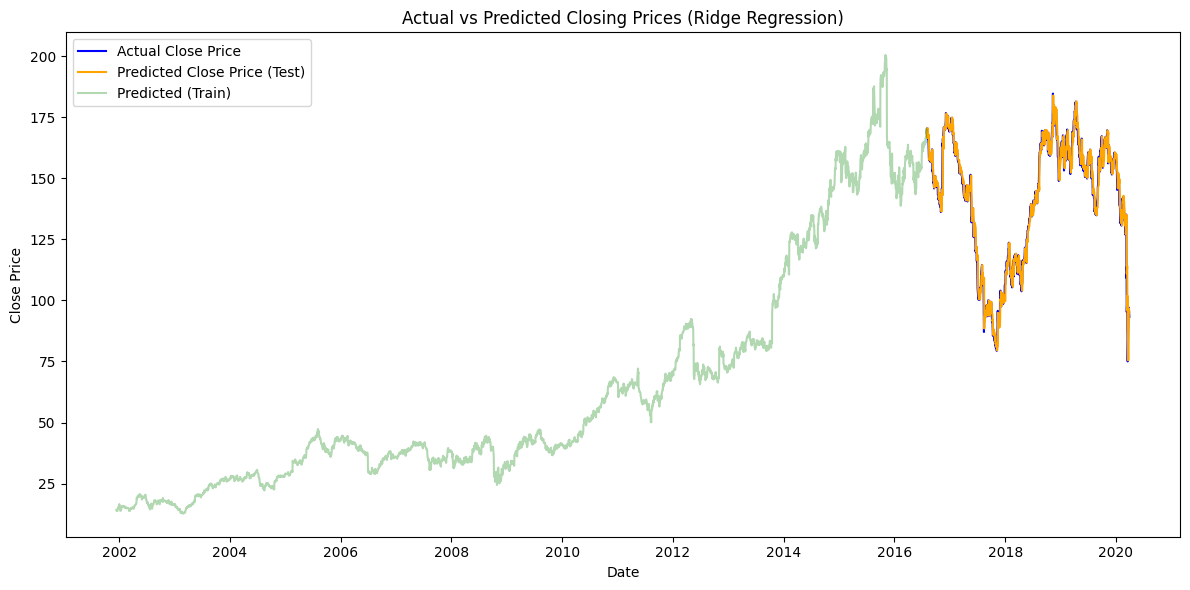

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Train predictions for overfitting check
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}")
print(f"Test  MSE: {test_mse:.4f}, MAE: {test_mae:.4f}")

plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual Close Price', color='blue')
plt.plot(dates_test, y_pred, label='Predicted Close Price (Test)', color='orange')
plt.plot(dates_train, y_train_pred, label='Predicted (Train)', color='green', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Closing Prices (Ridge Regression)')
plt.legend()
plt.tight_layout()
plt.show()
